<a href="https://colab.research.google.com/github/shekhar-iitg/keras_with_tensorflow_youtube_course/blob/main/0_simple_tf_keras_sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_samples = []
train_labels = []

* An experimental drug was tested on a group of people between the age of 13 to 100
* Trial had 2100 participants out of which half were below age 65 and half were above age 65
* Around 95% of patients 65 or older experienced side-effects
* Arount 95% of patients under 65 experienced no side-effects

In [3]:
for i in range(50):
    random_younger = randint(13, 65)
    train_samples.append(random_younger)
    train_labels.append(1)
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1050):
    random_younger = randint(13, 65)
    train_samples.append(random_younger)
    train_labels.append(0)
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

In [5]:
print(train_samples.shape, train_labels.shape)

(2200,) (2200,)


In [6]:
train_samples, train_labels = shuffle(train_samples, train_labels)

In [7]:
scaler = MinMaxScaler((0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [8]:
print(scaled_train_samples[:5])

[[0.70114943]
 [0.72413793]
 [0.27586207]
 [0.56321839]
 [0.05747126]]


# Simple tf.Keras Sequential Model

In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [10]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(f'No. of GPUs available: {len(physical_devices)}')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)?

No. of GPUs available: 0


In [11]:
model = Sequential([
    Dense(units = 16, input_shape = (1, ), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# model.fit(x = scaled_train_samples, y = train_labels, batch_size = 10, epochs = 30, shuffle = True, verbose = 2)

* NOTE: Shuffle = True shuffles the training data set after removing the validation set if we set
the parameter validation_set to some x percent. That is why we need to shuffle the training set before passing it to model.fit()

In [14]:
model.fit(x = scaled_train_samples, y = train_labels, validation_split = 0.1, batch_size = 10, epochs = 30, shuffle = True, verbose = 2)

Epoch 1/30
198/198 - 4s - 22ms/step - accuracy: 0.5985 - loss: 0.6706 - val_accuracy: 0.6318 - val_loss: 0.6628
Epoch 2/30
198/198 - 1s - 6ms/step - accuracy: 0.7202 - loss: 0.6434 - val_accuracy: 0.7455 - val_loss: 0.6348
Epoch 3/30
198/198 - 1s - 7ms/step - accuracy: 0.7833 - loss: 0.6119 - val_accuracy: 0.8136 - val_loss: 0.6048
Epoch 4/30
198/198 - 2s - 10ms/step - accuracy: 0.8106 - loss: 0.5810 - val_accuracy: 0.8273 - val_loss: 0.5738
Epoch 5/30
198/198 - 0s - 2ms/step - accuracy: 0.8475 - loss: 0.5488 - val_accuracy: 0.8455 - val_loss: 0.5422
Epoch 6/30
198/198 - 1s - 3ms/step - accuracy: 0.8545 - loss: 0.5174 - val_accuracy: 0.8727 - val_loss: 0.5105
Epoch 7/30
198/198 - 1s - 3ms/step - accuracy: 0.8712 - loss: 0.4863 - val_accuracy: 0.8727 - val_loss: 0.4791
Epoch 8/30
198/198 - 1s - 4ms/step - accuracy: 0.8843 - loss: 0.4565 - val_accuracy: 0.8773 - val_loss: 0.4488
Epoch 9/30
198/198 - 1s - 3ms/step - accuracy: 0.8904 - loss: 0.4283 - val_accuracy: 0.8955 - val_loss: 0.4210

# Creating Test Data

In [15]:
test_samples = []
test_labels = []

In [16]:
for i in range(10):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [17]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

test_samples, test_labels = shuffle(test_samples, test_labels)

In [18]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

# Prediction

In [19]:
predictions = model.predict(x = scaled_test_samples, batch_size = 10, verbose = 0)

In [20]:
print(predictions[:5])

[[0.05586933 0.94413066]
 [0.9785185  0.02148153]
 [0.25967446 0.7403255 ]
 [0.9381266  0.06187337]
 [0.05586933 0.94413066]]


In [21]:
prediction_labels = np.argmax(predictions, axis = 1)

In [22]:
print(prediction_labels[:5])

[1 0 1 0 1]


# Confusion Matrix

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [24]:
cm = confusion_matrix(y_true = test_labels, y_pred = prediction_labels)

In [25]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix
    Normalization can be applied by setting normalize = True
    """
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    thres = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment = 'center',
                color = 'white' if cm[i, j] > thres else 'black'
                )
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Confusion Matrix, without normalization
[[191  19]
 [ 10 200]]


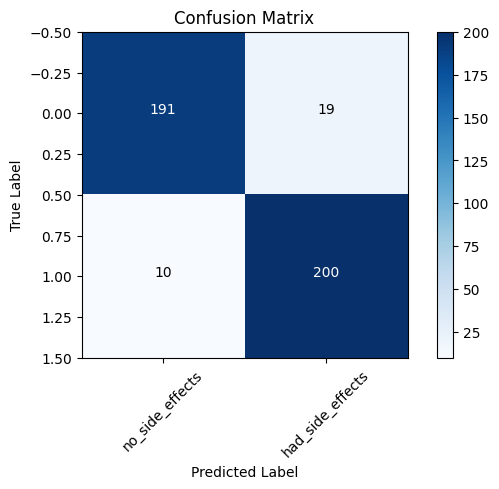

In [26]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels)

# Save and load a model

## 1. model.save()

In [27]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

This save function saves:
* The architecture of the model, allowing to re-create the model
* The weights of the model
* The training configuration (loss, optmizer)
* The state of the optimizer, allowing to resume training from where we left off

In [28]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [29]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 644 (2.52 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [30]:
# new_model.get_weights()

In [31]:
new_model.optimizer

## 2. model.to_json()

If we need to save only the architecture of the model without saving its weights or its training configurations, we can use this function to save it.

In [32]:
# save as json
json_string = model.to_json()

# save as yaml
# yaml_string = model.to_yaml()

In [33]:
json_string

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 1], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint": 

In [34]:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [35]:
model_architecture.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,928 (7.54 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286 (5.03 KB)

## 3. model.save_weights()

If we want to save only the weights of the model, we can use the following function to save the model weights only.

In [36]:
# import os.path
# if os.path.isfile('models/my_model_weights.h5') is False:
#     model.save_weights('models/my_model_weights.h5')